# <font color = blue> IMDb Movie Project </font>

We have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this project, we will try to find some interesting insights into these movies and their voters, using Python.

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Setting the display option to be able to view complete dataset while peeking.

pd.set_option('display.max_columns', 75)

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [4]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

movies = pd.read_csv('Project_data.csv')

In [5]:
# Taking a peek at the dataset

movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,93.0,128,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,69.0,118,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,81.0,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,96.0,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [6]:
# Check the number of rows and columns in the dataframe

movies.shape

(100, 62)

In [7]:
# Check the column-wise info of the dataframe

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [8]:
# Check the summary for the numeric columns 

movies.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,92404.170000,125762.230000,76715.280000,27841.450000,10171.750000,4330.110000,2477.070000,1711.570000,4084.350000,2.714462e+05,64468.860000,1769.050000,1318.950000,435.660000,165863.770000,128473.140000,35739.710000,124561.100000,103437.920000,19371.540000,24170.160000,19653.260000,4093.530000,624.370000,54096.740000,188245.680000,7.852000,7.910000,8.205000,8.174000,8.215000,8.005000,8.005000,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,75666.918775,62162.752481,32586.358624,12883.912563,5480.914204,2713.608902,1768.167506,1318.631164,3489.778403,1.676580e+05,39117.954828,1324.522818,1040.959361,366.499996,103522.932356,83188.725257,23092.041366,72089.245359,61116.374727,11324.680698,12841.696513,10669.041306,2187.955655,133.244262,32115.288162,106902.256347,0.263036,0.298312,0.305959,0.358059,0.381484,0.271686,0.281904,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,7321.000000,11668.000000,8558.000000,3370.000000,1162.000000,456.000000,227.000000,158.000000,293.000000,2.244100e+04,9552.000000,121.000000,95.000000,20.000000,15959.000000,10150.000000,4370.000000,12174.000000,9280.000000,2682.000000,1899.000000,1496.000000,355.000000,198.000000,3678.000000,19009.000000,7.400000,7.300000,7.500000,7.400000,7.200000,7.600000,7.600000,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,47098.250000,83207.500000,54934.500000,17834.500000,6026.000000,2293.500000,1172.750000,761.750000,1532.750000,1.719362e+05,35188.750000,756.250000,579.000000,159.750000,109797.750000,77537.750000,17637.750000,78866.250000,64930.250000,12030.500000,15288.750000,12154.750000,2492.750000,545.000000,33328.750000,121863.500000,7.675000,7.700000,8.000000,7.900000,7.975000,7.800000,7.800000,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,71376.000000,117405.500000,76862.000000,27072.000000,9123.000000,3801.000000,1950.000000,1320.000000,2933.000000,2.381995e+05,58539.500000,1420.000000,998.000000,325.500000,139321.500000,111362.000000,32639.500000,111317.500000,94010.500000,17763.000000,21869.500000,17782.000000,3771.500000,639.500000,48560.000000,169132.000000,7.800000,7.900000,8

We now have a fair idea about the dataset - dimensions, null-values, and statistical summary of different numeric columns.

## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [9]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

movies[['budget', 'Gross']] = movies[['budget', 'Gross']]/1000000

In [10]:
# Inspecting the results

movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,93.0,128,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,69.0,118,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,81.0,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,96.0,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [11]:
# Inserting a new column 'profit' at 4th position having value = Gross-budget

movies.insert(4, column = 'profit', value = movies.Gross-movies.budget)

In [12]:
# Confirming addition of a column by re-checking the shape of the dataset

movies.shape

(100, 63)

In [13]:
# Sorting the dataset inplace in descending order of profit while ignoring the indices.

movies.sort_values(by = 'profit', ascending = False, inplace = True, ignore_index = True)

In [14]:
# Inspecting the made changes by peeking at profit column vales. Checking if they are in descending order.

movies.profit.head(10)

0    691.662225
1    403.279547
2    305.024263
3    294.645577
4    214.984497
5    198.130642
6    197.756197
7    191.268248
8    182.501645
9    181.454367
Name: profit, dtype: float64

In [15]:
""" Extracting the top 10 movie names (0-9 rows and 0 column) from the movies dataset by position based indexing 
and storing them in the specified dataset."""

top10 = movies.iloc[0:10,0]
top10

0    Star Wars: Episode VII - The Force Awakens
1                                  The Avengers
2                                      Deadpool
3               The Hunger Games: Catching Fire
4                                   Toy Story 3
5                         The Dark Knight Rises
6                                The Lego Movie
7                                      Zootopia
8                                 Despicable Me
9                                    Inside Out
Name: Title, dtype: object

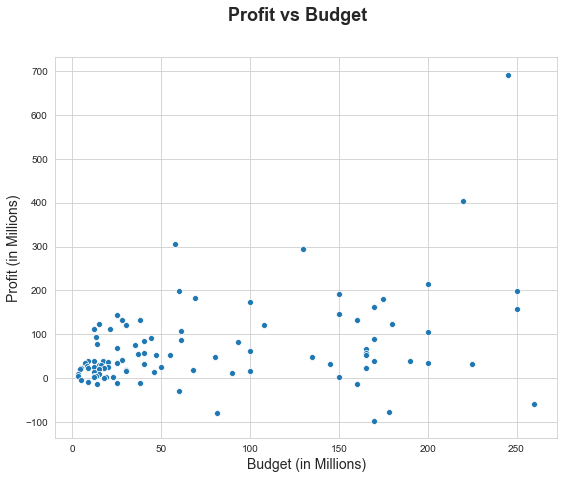

In [16]:
#Plot profit vs budget

# Setting size and style of the plot
plt.figure(figsize= [9,7])
sns.set_style('whitegrid') 

# Plotting the scatterplot using seaborn
sns.scatterplot(data = movies, x= 'budget', y='profit')

# Formatting labels and Title of the plot
plt.xlabel('Budget (in Millions)', fontsize = 14)
plt.ylabel('Profit (in Millions)', fontsize = 14)
plt.suptitle('Profit vs Budget', fontweight = 'bold', fontsize = 18)

plt.show()

#### Inferences from the plot.

- Most of the movies are profitable in the given dataset as they have a profit value greater than zero.
- Higher budget for the movie does not necessarily ensure good profits. There are many movies with high budget but not so high profits.
- A lot of movies are having a budget of 0-100 Million USD and yielding a profit of 0-200 Million USD.

The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [17]:
# Storing all the rows where profit is less than zero into a new dataframe named neg_profit

neg_profit = movies[movies['profit']<0]
neg_profit.reset_index(drop = True, inplace = True)

In [18]:
# Displaying the datframe having movies with negative profit values.
neg_profit

,Title,title_year,budget,Gross,profit,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,Tucker and Dale vs Evil,2010,5.0,0.223838,-4.776162,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.0,440.0,7.6,Comedy,Horror,NaN,65.0,124,16572,19818,44460,35863,13456,4588,1684,855,479,848,106144,15113,219,198,20,52889,45169,7232,56379,49634,6156,8861,7645,1072,540,26213,73918,7.5,7.7,7.7,7.7,8.2,7.6,7.6,7.6,7.5,7.5,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada
1,Amour,2012,8.9,0.225377,-8.674623,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,7.9,Drama,Romance,NaN,94.0,127,11093,15944,22942,14187,5945,2585,1188,710,534,995,49808,16719,121,95,24,28593,20107,8167,28691,21990,6269,7425,5803,1490,391,7959,46138,7.8,7.9,8.6,8.7,8.5,8.0,8.0,7.9,7.7,7.7,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France
2,Rush,2013,38.0,26.903709,-11.096291,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,8.1,Action,Biography,Drama,75.0,123,53667,90907,119603,57343,14948,4436,1625,803,633,1532,246354,35289,888,769,115,138327,119048,17987,105712,92487,11717,20105,17096,2660,593,30738,168519,8.1,8.0,8.3,8.3,8.0,8.3,8.3,8.2,8.0,8.0,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK
3,Warrior,2011,25.0,13.651662,-11.348338,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,8.2,Action,Drama,Sport,71.0,140,74983,96953,106673,52972,16668,5727,2353,1205,1050,2479,270734,31075,673,583,84,153824,136536,16000,117636,105144,11019,15201,12960,1990,586,45342,176397,8.2,8.2,8.5,8.5,8.7,8.4,8.4,8.4,8.0,8.0,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA
4,Flipped,2010,14.0,1.752214,-12.247786,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,7.7,Comedy,Drama,Romance,NaN,124,11354,11050,20808,14372,5412,1848,664,321,230,402,33714,22540,320,108,207,32475,16916,15217,18576,12982,5338,3399,2616,721,275,7362,36050,7.6,7.9,8.0,7.6,8.3,7.9,7.8,8.0,7.5,7.5,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA
5,X-Men: First Class,2011,160.0,146.405371,-13.594629,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,7.8,Action,Adventure,Sci-Fi,65.0,132,64428,96219,200144,129352,41945,12861,4799,2349,1448,3182,382107,80444,2075,1612,443,223309,176821,44428,185909,157332,26094,30217,25051,4691,780,87542,257681,7.7,7.9,8.0,7.9,8.3,7.9,7.9,8.0,7.7,7.6,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA
6,Scott Pilgrim vs. the World,2010,60.0,31.494270,-28.505730,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,7.5,Action,Comedy,Romance,69.0,112,47292,48976,79198,59689,28452,13451,6977,4254,3069,6287,208417,45718,1022,791,221,129202,99363,28557,102986,88456,13334,14195,12157,1778,677,56559,150511,7.5,7.4,8.1,8.2,8.0,7.6,7.7,7.5,7.4,7.4,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA
7,Tangled,2010,260.0,200.807262,-59.192738,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,7.8,Animation,Adventure,Comedy,71.0,124,56575,54688,97207,70947,26805,8530,3043,1396,805,1606,166088,97213,1950,1048,885,144744,81897,61390,89588,63534,24912,15318,11277,3805,622,47643,148024,7.6,8.2,7.8,7.4,8.3,7.9,7.7,8.2,7.6,7.5,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA
8,Edge of Tomorrow,2014,178.0,100.189501,-77.810499,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,7.9,Action,Adventure,Sci-Fi,71.0,113,60383,99596,175961,100724,28982,8145,2858,1368,857,1661,341199,45790,1893,1584,292,172016,148814,21495,157476,138752,16463,30965,26562,3820,691,55486,217557,7.9,7.8,8.2,8.1,8.2,8.0,8.0,7.8,7.8,7.8,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA
9,The Little P

**`Checkpoint:`** 

You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics 

As a part of this subtask, we will find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly we notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, we need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference between the `IMDb_rating` and `Metacritic` columns is less than 0.5.
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [19]:
# Change the scale of MetaCritic

movies.MetaCritic = movies.MetaCritic.apply(lambda x : x/10 if x>10 else x)

In [20]:
# Taking a peek at values in MetaCrtic column
movies.MetaCritic.head()

0    8.1
1    6.9
2    6.5
3    7.6
4    9.2
Name: MetaCritic, dtype: float64

In [21]:
# Inserting a new column 'Avg-rating' at 18th index having value as mean of IMDb_rating and MetaCrtic column values

movies.insert(18, column = 'Avg_rating', value = movies.loc[:,['IMDb_rating', 'MetaCritic']].mean(axis = 1))

In [22]:
#Sort in descending order of average rating

movies.sort_values(by= 'Avg_rating', ascending= False, inplace= True, ignore_index= True)

# Checking the dataframe
movies.loc[:,['Avg_rating', 'IMDb_rating', 'MetaCritic']]

,Avg_rating,IMDb_rating,MetaCritic
0,8.95,7.9,10.0
1,8.85,8.1,9.6
2,8.80,8.2,9.4
3,8.75,8.2,9.3
4,8.75,7.9,9.6
...,...,...,...
95,7.15,7.8,6.5
96,7.10,7.7,6.5
97,7.05,7.6,6.5
98,7.00,7.6,6.4


In [23]:
# Find the movies with (metacritic- IMDb_rating) < 0.5 and also with the average rating of >8

UniversalAcclaim= movies[(abs(movies.MetaCritic - movies.IMDb_rating) < 0.5) & (movies.Avg_rating >= 8)]

In [24]:
# Resetting the index values for the dataframe.

UniversalAcclaim.reset_index(drop= True, inplace= True)

# checking the result

UniversalAcclaim

,Title,title_year,budget,Gross,profit,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,Avg_rating,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,Whiplash,2014,3.3,13.092000,9.792000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,8.5,Drama,Music,NaN,8.8,107,110404,8.65,161864,132656,56007,16577,6031,2937,1859,1263,2723,308900,71066,2878,2200,660,205839,161853,41944,123712,102839,19018,23345,19072,3812,590,49868,213952,8.5,8.4,9.0,9.1,8.9,8.6,8.7,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
1,Django Unchained,2012,100.0,162.804648,62.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,8.4,Drama,Western,NaN,8.1,165,234824,8.25,339329,286911,121445,38251,14227,6469,4149,3181,8065,695211,139226,3250,2726,501,410538,332690,74006,301231,253253,43774,57463,47535,8962,816,123423,448126,8.4,8.4,8.8,8.9,8.5,8.6,8.6,8.5,8.3,8.3,8.3,8.0,8.0,8.1,7.8,8.4,8.4,R,USA
2,Dallas Buyers Club,2013,5.0,27.296514,22.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,8.0,Biography,Drama,NaN,8.4,117,37544,8.20,82276,145488,66156,16777,4582,1721,870,654,1588,231258,63266,864,650,205,145018,110493,32974,110555,88233,20687,22093,16963,4743,598,42222,173002,7.9,8.1,8.2,8.2,8.1,8.1,8.1,8.1,7.8,7.8,8.0,7.8,7.8,8.0,7.2,8.0,7.9,R,USA
3,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,691.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,Action,Adventure,Fantasy,8.1,136,155391,8.10,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA
4,Arrival,2016,47.0,100.546139,53.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,8.1,116,55533,8.05,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
5,Gone Girl,2014,61.0,167.735396,106.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,8.1,Crime,Drama,Mystery,7.9,149,89539,8.00,177373,218018,103600,32989,11691,5285,3262,2247,5500,397571,113606,2286,1598,665,260425,193602,64291,179552,144771,32133,34696,27226,6840,689,70667,280587,8.1,8.1,8.5,8.6,8.4,8.3,8.3,8.2,7.9,8.0,7.9,7.7,7.7,7.7,7.6,8.1,8.1,R,USA
6,The Martian,2015,108.0,228.430993,120.430993,Matt Damon,Donald Glover,Benedict Wong,13000,801.0,372.0,8.0,Adventure,Drama,Sci-Fi,8.0,144,75560,8.00,139593,200315,102723,31179,9930,3815,2046,1316,2907,359265,71421,3206,2543,638,200653,161765,36790,161073,136425,22228,35406,29354,5409,671,61128,239125,8.0,8.1,8.4,8.4,8.5,8.1,8.1,8.1,7.9,7.9,7.9,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA


- ### Subtask 2.4: Find the Most Popular Trios - I

Suppose you are a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.

In [25]:
# Separating out the Title, cast names and FB likes data into a separate datafrrame.
fb_likes_data = movies.loc[:,['Title', 
                         'actor_1_name','actor_2_name','actor_3_name', 
                         'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']]

# Adding a new column 'total_facebook_likes'
fb_likes_data['total_facebook_likes'] = fb_likes_data.loc[:,['actor_1_facebook_likes', 
                                                             'actor_2_facebook_likes',
                                                             'actor_3_facebook_likes']].sum(axis=1)

# Sorting the new dataframe in descending order of total_facebook_likes
fb_likes_data.sort_values(by='total_facebook_likes', ascending= False, inplace= True, ignore_index= True)
# Checking
fb_likes_data.head()

,Title,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,total_facebook_likes
0,Lion,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,138800.0
1,Inception,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
2,X-Men: Days of Future Past,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
3,Manchester by the Sea,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,74818.0
4,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0


In [26]:
# Filtering out names and cast of top 5 movies based on likes into a new dataframe.
top5_likes = fb_likes_data.loc[0:4,['Title','actor_1_name','actor_2_name','actor_3_name']]
# Checking
top5_likes

,Title,actor_1_name,actor_2_name,actor_3_name
0,Lion,Dev Patel,Nicole Kidman,Rooney Mara
1,Inception,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt
2,X-Men: Days of Future Past,Jennifer Lawrence,Peter Dinklage,Hugh Jackman
3,Manchester by the Sea,Casey Affleck,Michelle Williams,Kyle Chandler
4,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt


In [27]:
# Storing the actor names (column 1,2,3) in a list named most_popular_trio
most_popular_trios= top5_likes.iloc[:,1:].values.tolist()
# Displaying the result as a list
most_popular_trios

[['Dev Patel', 'Nicole Kidman', 'Rooney Mara'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`**

- **`Most popular trio after applying the condition:`**

In [28]:
# We will use this dataframe for our analysis
fb_likes_data.head(10)

,Title,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,total_facebook_likes
0,Lion,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,138800.0
1,Inception,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
2,X-Men: Days of Future Past,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
3,Manchester by the Sea,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,74818.0
4,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0
5,Silver Linings Playbook,Jennifer Lawrence,Robert De Niro,Bradley Cooper,34000,22000.0,14000.0,70000.0
6,The Avengers,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,66000.0
7,Doctor Strange,Benedict Cumberbatch,Chiwetel Ejiofor,Rachel McAdams,19000,NaN,46000.0,65000.0
8,Zootopia,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,57800.0
9,The Big Short,Ryan Gosling,Christian Bale,Charlie Talbert,33000,23000.0,767.0,56767.0


In [29]:
# Storing the like counts for each actor of a film in a multidimensional list.
likes= fb_likes_data.loc[:,['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']].values.tolist()

In [30]:
""" Checking the condition i.e each actor should not have likes less than half of other two actors' likes.  
Storing the index number for movies which meet the condition in the list named 'indices'.  
"""
indices = []
for i in range(0,len(likes)):
    if min(likes[i]) >= max(likes[i])/2:
        indices.append(i)

In [31]:
# Filtering out the movies that satisfy the condition in a new dataframe named 'ind_pop' and resetting index.
ind_pop= fb_likes_data.iloc[indices, :]
ind_pop.reset_index(drop = True, inplace = True)
# Checking the shape of dataframe.
ind_pop.shape

(21, 8)

##### There are 21 trios that satisfy the condition.

In [32]:
# Finding intersection of the dataframe. This will give the trios that are both popular and individually popular.
ind_and_trio = top5_likes[top5_likes['Title'].isin(ind_pop['Title'])]
# Checking the result
ind_and_trio

,Title,actor_1_name,actor_2_name,actor_3_name
1,Inception,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt
2,X-Men: Days of Future Past,Jennifer Lawrence,Peter Dinklage,Hugh Jackman
4,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt


##### The most popular trio after applying the condition of individual popularity is - Leonardo DiCaprio, Tom Hardy & Joseph Gordon-Levitt

- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. We will plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

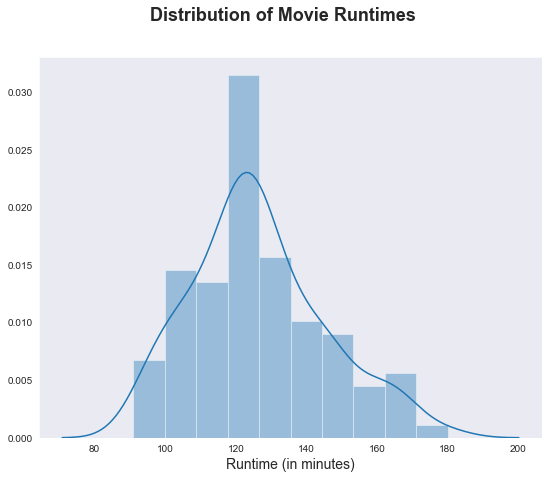

In [33]:
# Runtime histogram/density plot

#setting the figure size and style of the plot
plt.figure(figsize= [9,7])
sns.set_style('dark')

# Plotting the values using Seaborn
sns.distplot(movies.Runtime)

# Customising labels and Title of plot
plt.xlabel('Runtime (in minutes)', fontsize = 14)
plt.suptitle('Distribution of Movie Runtimes', fontweight = 'bold', fontsize = 18)

plt.show()

Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [34]:
# Filtering out R rated movies and sorting them based on vote counts of audience under age of 18.
PopularR = movies[movies['content_rating']== 'R'].sort_values(by= 'CVotesU18', ascending= False, ignore_index= True)[0:10]
# Checking the new dataframe
PopularR

,Title,title_year,budget,Gross,profit,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,Avg_rating,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,Deadpool,2016,58.0,363.024263,305.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,Action,Adventure,Comedy,6.5,108,147467,7.25,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA
1,The Wolf of Wall Street,2013,100.0,116.866727,16.866727,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,8.2,Biography,Comedy,Crime,7.5,180,171660,7.85,236650,250667,129164,46715,18682,8674,5854,4258,9689,559564,123698,3622,2842,757,360841,286627,70874,227096,189110,34712,39996,32676,6629,730,89006,366829,8.2,7.8,8.6,8.7,8.0,8.4,8.5,7.9,8.0,8.1,7.7,7.6,7.6,7.5,7.8,8.1,8.1,R,USA
2,Django Unchained,2012,100.0,162.804648,62.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,8.4,Drama,Western,NaN,8.1,165,234824,8.25,339329,286911,121445,38251,14227,6469,4149,3181,8065,695211,139226,3250,2726,501,410538,332690,74006,301231,253253,43774,57463,47535,8962,816,123423,448126,8.4,8.4,8.8,8.9,8.5,8.6,8.6,8.5,8.3,8.3,8.3,8.0,8.0,8.1,7.8,8.4,8.4,R,USA
3,Mad Max: Fury Road,2015,150.0,153.629485,3.629485,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,8.1,Action,Adventure,Sci-Fi,9.0,120,136194,8.55,158403,163494,97218,42636,19505,9932,6743,4930,10516,424435,69670,3159,2682,456,238202,198026,37751,183637,159520,21373,34848,29980,4209,726,73080,267084,8.1,7.9,8.5,8.6,8.4,8.3,8.3,8.1,8.0,8.0,7.8,7.5,7.5,7.2,8.0,8.2,8.0,R,Australia
4,Whiplash,2014,3.3,13.092000,9.792000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,8.5,Drama,Music,NaN,8.8,107,110404,8.65,161864,132656,56007,16577,6031,2937,1859,1263,2723,308900,71066,2878,2200,660,205839,161853,41944,123712,102839,19018,23345,19072,3812,590,49868,213952,8.5,8.4,9.0,9.1,8.9,8.6,8.7,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
5,The Revenant,2015,135.0,183.635922,48.635922,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,8.0,Adventure,Drama,Thriller,7.6,156,79977,7.80,121229,158019,91154,33492,12837,5571,3386,2320,4570,323938,61051,2619,2141,458,186003,152198,31926,138923,118140,18699,28582,23782,4269,624,51493,213741,8.0,7.9,8.5,8.5,8.2,8.1,8.2,7.9,7.9,7.9,7.7,7.8,7.8,7.8,7.6,8.1,7.9,R,USA
6,Shutter Island,2010,80.0,127.968405,47.968405,Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto,29000,223.0,163.0,8.1,Mystery,Thriller,NaN,6.3,138,150405,7.20,230844,278844,132349,45167,15615,7061,3780,2662,4703,570554,136360,2321,1811,494,364786,283316,78332,263273,217923,42222,43235,35277,7256,840,108244,419648,8.1,8.2,8.6,8.6,8.8,8.4,8.4,8.4,7.9,7.9,8.0,7.5,7.4,7.6,7.6,7.8,8.1,R,USA
7,Gone Girl,2014,61.0,167.735396,106.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,8.1,Crime,Drama,Mystery,7.9,149,89539,8.00,177373,218018,103600,32989,11691,5285,3262,2247,5500,397571,113606,2286,1598,665,260425,193602,64291,179552,144771,32133,34696,27226,6840,689,70667,280587,8.1,8.1,8.5,8.6,8.4,8.3,8.3,8.2,7.9,8.0,7.9,7.7,7.7,7.7,7.6,8.1,8.1,R,USA
8,The Grand Budapest Hotel,2014,25.0,59.073773,34.073773,Bill Murray,Tom Wilkinson,F. Murray Abraham,13000,1000.0,670.0,8.1,Adventure,Comedy,Drama,8.8,99,84258,8.45,142011,168705,88086,31632,12023,5455,3196,2204,3971,332149,96997,2083,1537,530,216106,15

## Task 3 : Demographic analysis

If we take a look at the last columns in the dataframe, most of these are related to demographics of the voters. We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [35]:
# Appending the positional index of columns starting with 'CV', 'V' or 'ge' into a list named 'columns'
columns = []
for i in movies.columns:
    if i.startswith('CV') or i.startswith('V') or i.startswith('ge'):
        columns.append(i)

# Extracting the required data into a new dataframe
df_by_genre = movies.loc[:, columns]

# Checking the number of columns to be 47.
df_by_genre.shape

(100, 47)

In [36]:
# Create a column cnt and initialize it to 1

df_by_genre['cnt'] = 1

In [37]:
# Group the movies by individual genres

# Grouping data in columns 'genre-1', 'genre-2', 'genre-3' and storing their groupby objects.
df_by_g1 = df_by_genre.groupby('genre_1')
df_by_g2 = df_by_genre.groupby('genre_2')
df_by_g3 = df_by_genre.groupby('genre_3')

#using the groupby objects to get the grouped dataframes.
df_by_g1= pd.DataFrame(df_by_g1.sum())
df_by_g2= pd.DataFrame(df_by_g2.sum())
df_by_g3= pd.DataFrame(df_by_g3.sum())

In [38]:
# Add the grouped data frames and store it in a new data frame

df_g1_g2 = df_by_g1.add(df_by_g2, fill_value=0)
df_add = df_g1_g2.add(df_by_g3, fill_value=0)

In [39]:
# Extract genres with atleast 10 occurences

genre_top10= df_add[df_add['cnt']>=10]
# Peeking at the result
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,10837034.0,2105410.0,76280.0,59424.0,16302.0,6314227.0,5105793.0,1146894.0,4824318.0,4117926.0,639437.0,894736.0,746866.0,132357.0,21123.0,2144895.0,7005964.0,243.2,245.6,253.8,252.8,256.8,247.8,247.5,248.0,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,11759815.0,2705904.0,95791.0,72215.0,22864.0,7165429.0,5578727.0,1516049.0,5262641.0,4400217.0,788533.0,1012382.0,832607.0,162152.0,25157.0,2345901.0,7905326.0,298.4,304.5,311.4,309.3,314.9,304.9,304.3,307.3,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,2282985.0,724844.0,23835.0,16354.0,7307.0,1588630.0,1140646.0,432464.0,1043387.0,834069.0,195268.0,179365.0,142636.0,33699.0,6364.0,524406.0,1654665.0,86.4,89.3,88.9,87.7,90.7,88.5,87.9,90.2,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,4329471.0,986889.0,20937.0,15962.0,4780.0,2603294.0,2052779.0,524830.0,1999316.0,1658844.0,312373.0,405909.0,324710.0,74280.0,10804.0,817016.0,3078088.0,141.1,141.8,146.9,146.6,146.9,143.4,143.7,142.8,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,5223033.0,1498288.0,37971.0,27099.0,10574.0,3404755.0,2507369.0,862715.0,2453650.0,1985974.0,433363.0,458960.0,367532.0,83303.0,13934.0,1132079.0,3815002.0,180.2,181.2,187.4,186.9,186.9,183.6,183.8,182.8,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0


In [40]:
# Take the mean for every column by dividing with cnt 

""" Dividing every row in the dataframe by its respective cnt value to get the mean values. 
[:-1] is used to avoid dividing cnt by cnt. We want to retain the value of cnt."""

for i in genre_top10.columns[:-1]:
    genre_top10[i] = genre_top10[i]/genre_top10['cnt']

In [42]:
# Rounding off the columns of Votes to two decimals

genre_top10= genre_top10.apply(lambda x: round(x,2), axis=0)

# All values have been rounded off we will later typecast all other values to int to get the desired result.

In [43]:
# Converting CVotes to int type

CVotes_columns = []
for i in genre_top10.columns:
    if i.startswith('CVotes'):
        CVotes_columns.append(i)

genre_top10[CVotes_columns] = genre_top10[CVotes_columns].astype('int')
# Checking the dtype of every column
genre_top10.dtypes


CVotes10          int32
CVotes09          int32
CVotes08          int32
CVotes07          int32
CVotes06          int32
CVotes05          int32
CVotes04          int32
CVotes03          int32
CVotes02          int32
CVotes01          int32
CVotesMale        int32
CVotesFemale      int32
CVotesU18         int32
CVotesU18M        int32
CVotesU18F        int32
CVotes1829        int32
CVotes1829M       int32
CVotes1829F       int32
CVotes3044        int32
CVotes3044M       int32
CVotes3044F       int32
CVotes45A         int32
CVotes45AM        int32
CVotes45AF        int32
CVotes1000        int32
CVotesUS          int32
CVotesnUS         int32
VotesM          float64
VotesF          float64
VotesU18        float64
VotesU18M       float64
VotesU18F       float64
Votes1829       float64
Votes1829M      float64
Votes1829F      float64
Votes3044       float64
Votes3044M      float64
Votes3044F      float64
Votes45A        float64
Votes45AM       float64
Votes45AF       float64
Votes1000       

If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

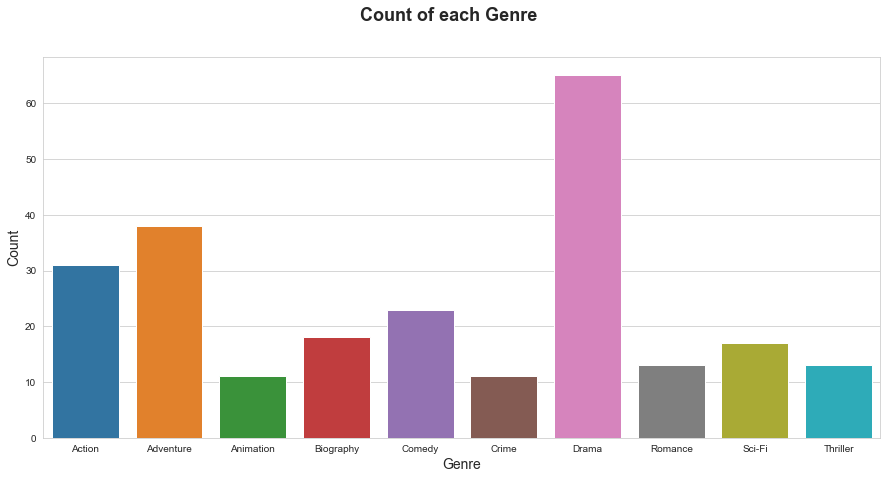

In [44]:
# Countplot for genres

# Setting plot size and style.
plt.figure(figsize= [15,7])
sns.set_style('whitegrid')

# Plotting the values
sns.barplot(x= genre_top10.index, y= genre_top10.cnt)

# Setting the labels and Plot Title
plt.xlabel('Genre', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.suptitle('Count of each Genre', fontweight = 'bold', fontsize = 18)

plt.show()

-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.

4. Repeat subtasks 1 to 3, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

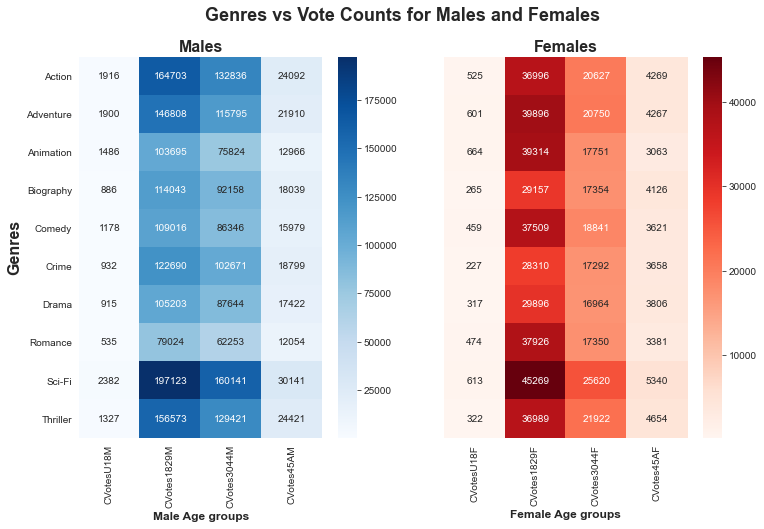

In [45]:
# 1st set of heat maps for CVotes-related columns

# Creating new dataframe having mean values of CVotes for males of different age groups.
CVotes_males= genre_top10.groupby(genre_top10.index)['CVotesU18M', 
                                                     'CVotes1829M', 
                                                     'CVotes3044M', 
                                                     'CVotes45AM'].mean()

# Creating new dataframe having mean values of CVotes for females of different age groups.
CVotes_females= genre_top10.groupby(genre_top10.index)['CVotesU18F', 
                                                       'CVotes1829F', 
                                                       'CVotes3044F', 
                                                       'CVotes45AF'].mean()


# Defining the subplot. It will have 2 plots in a single row sharing the y axis.
f,(ax_male,ax_female) = plt.subplots(1,2, figsize= (12,7), sharey= True)

# Plotting the heatmap for males in [1,2,1] position.
g_male= sns.heatmap(CVotes_males,
                    cmap= 'Blues', 
                    annot= True, 
                    fmt= 'd', 
                    ax=ax_male)

# Plotting the heatmap for females in [1,2,2] position.
g_female= sns.heatmap(CVotes_females, 
                      cmap= 'Reds', 
                      annot= True,  
                      fmt= 'd', 
                      ax=ax_female)

""" Note different colors has been used for the heatmaps having their individual color bars.
This has been done to avoid confusion because the number of CVotes for males is way greater than number of CVotes for females.
"""
# Setting the subplot titles, x and y labels and the plot title.
ax_male.set_title('Males', fontsize= 16, fontweight= 'bold')
ax_female.set_title('Females', fontsize= 16, fontweight= 'bold')
g_male.set_ylabel('Genres', fontsize= 16, fontweight= 'bold')
g_male.set_xlabel('Male Age groups', fontsize= 12, fontweight= 'bold')
g_female.set_xlabel('Female Age groups', fontsize= 12, fontweight= 'bold')
f.suptitle('Genres vs Vote Counts for Males and Females', fontsize=18, fontweight='bold')

plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: Both males and females having age 18 to 44 have voted the most. In general under18 and 45above age groups either don't watch many movies or they don't vote much. Males in general have votes a lot more than females.
- Inference 2: Sci-Fi is the most voted genre for both the genders even though it has lesser count (as per Subtask 3.2)
- Inference 3: Romance has the least vote count for all age groups for males however, females from 18 to 29 years of age have voted a lot for Romance genre.

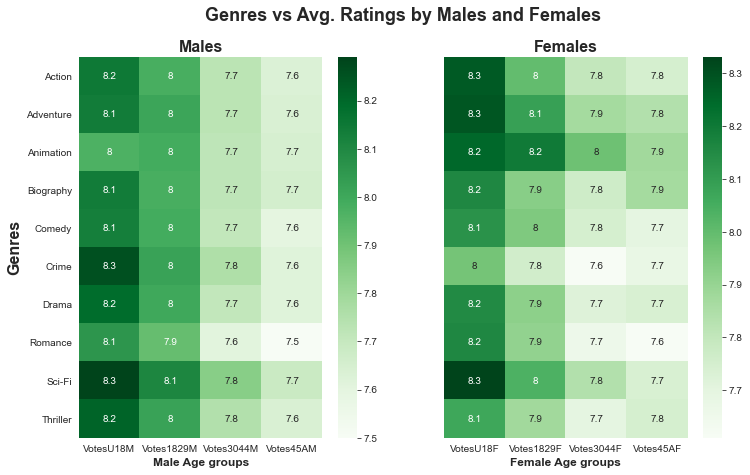

In [46]:
# 2nd set of heat maps for Votes-related columns

# Creating new dataframe having mean values of Votes for males of different age groups.
AvgVotes_males= genre_top10.groupby(genre_top10.index)['VotesU18M', 
                                                     'Votes1829M', 
                                                     'Votes3044M', 
                                                     'Votes45AM'].mean()

# Creating new dataframe having mean values of Votes for females of different age groups.
AvgVotes_females= genre_top10.groupby(genre_top10.index)['VotesU18F', 
                                                       'Votes1829F', 
                                                       'Votes3044F', 
                                                       'Votes45AF'].mean()

# Defining the subplot. It will have 2 plots in a single row sharing the y axis.
f,(ax_male,ax_female) = plt.subplots(1,2, figsize= (12,7), sharey= True)

# Plotting the heatmap for males in [1,2,1] position.
g_male= sns.heatmap(AvgVotes_males, 
                    cmap= 'Greens', 
                    annot= True,
                    ax=ax_male)

# Plotting the heatmap for females in [1,2,2] position.
g_female= sns.heatmap(AvgVotes_females, 
                      cmap= 'Greens', 
                      annot= True,
                      ax=ax_female)

# Setting the subplot titles, x and y labels and the plot title.
ax_male.set_title('Males', fontsize= 16, fontweight= 'bold')
ax_female.set_title('Females', fontsize= 16, fontweight= 'bold')
g_male.set_ylabel('Genres', fontsize= 16, fontweight= 'bold')
g_male.set_xlabel('Male Age groups', fontsize= 12, fontweight= 'bold')
g_female.set_xlabel('Female Age groups', fontsize= 12, fontweight= 'bold')
f.suptitle('Genres vs Avg. Ratings by Males and Females', fontsize=18, fontweight='bold')
plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: Younger age groups are less critical, giving good ratings to the movies while the older generations have critiqued the movies. This maybe be because of a developed/ refined pallete over the years.
- Inference 2: Sci-Fi movies have a very good score in terms of rating despite having the most number of voters in both the genders. It is the clear winner in terms of both count and ratings.
- Inference 3: Males have highly rated Crime movies as compared to females. Reverse is true for Animation.

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

In [47]:
# We will be using this dataframe.
movies.head()

,Title,title_year,budget,Gross,profit,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,Avg_rating,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,Boyhood,2014,4.0,25.359200,21.359200,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,7.9,Drama,NaN,NaN,10.0,165,49673,8.95,62055,76838,52238,23789,10431,4906,3071,2248,5086,183807,51558,1393,995,381,123006,92639,29076,81594,65261,15118,17881,13995,3567,559,36433,134679,8.0,7.7,8.1,8.1,8.0,8.1,8.1,7.8,7.8,7.8,7.6,7.7,7.7,7.7,7.2,8.0,7.9,R,USA
1,12 Years a Slave,2013,20.0,56.667870,36.667870,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,8.1,Biography,Drama,History,9.6,134,75556,8.85,126223,161460,83070,27231,9603,4021,2420,1785,4739,313823,82012,1837,1363,457,200910,153669,45301,138762,112943,23895,29252,23072,5726,664,53328,224519,8.1,8.1,8.4,8.4,8.5,8.2,8.2,8.2,8.0,7.9,8.0,7.8,7.8,8.1,7.7,8.3,8.0,R,USA
2,Inside Out,2015,175.0,356.454367,181.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,8.2,Animation,Adventure,Comedy,9.4,95,87509,8.80,113244,119801,67153,24210,8542,3349,1872,1123,3450,244433,79081,3361,2294,1040,170056,121574,46685,108560,86312,20516,18694,14910,3416,587,48297,176446,8.2,8.2,8.4,8.4,8.3,8.3,8.3,8.3,8.1,8.1,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA
3,La La Land,2016,30.0,151.101803,121.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,9.3,128,74245,8.75,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.695371,38.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,9.6,137,18191,8.75,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


In [48]:
# Creating IFUS column

movies['IFUS']= movies.Country.apply(lambda x: 'USA' if x== 'USA' else 'non-USA')

In [49]:
# Checking the counts for movies made in USA and not made in USA
movies.IFUS.value_counts()

USA        81
non-USA    19
Name: IFUS, dtype: int64

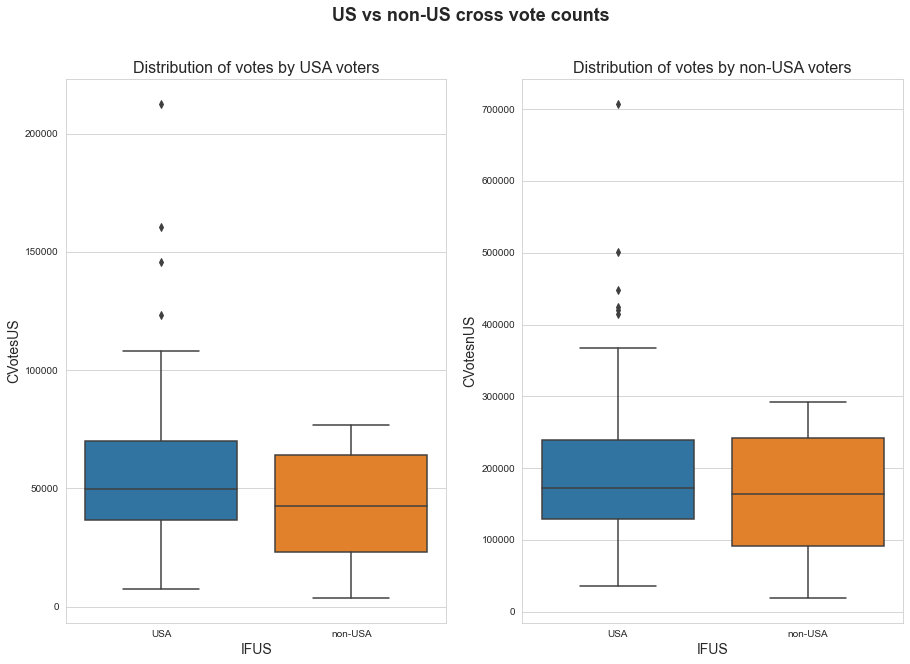

In [50]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)

# Defining the subplot. It will have 2 plots in a single row.
f,axes = plt.subplots(1,2, figsize= (15,10))

# Boxplot for CVotesUS 
g_USA= sns.boxplot(x= 'IFUS', y= 'CVotesUS', data=movies, ax=axes[0])

# Boxplot for CVotesnUS
g_nUSA= sns.boxplot(x= 'IFUS', y= 'CVotesnUS', data=movies, ax=axes[1])

# Setting the subplot titles, x and y labels and the plot title.
g_USA.axes.set_title('Distribution of votes by USA voters', fontsize= 16)
g_nUSA.axes.set_title('Distribution of votes by non-USA voters', fontsize= 16)
g_USA.axes.set_ylabel('CVotesUS', fontsize= 14)
g_USA.axes.set_xlabel('IFUS', fontsize= 14)
g_nUSA.axes.set_ylabel('CVotesnUS', fontsize= 14)
g_nUSA.axes.set_xlabel('IFUS', fontsize= 14)
f.suptitle('US vs non-US cross vote counts', fontsize=18, fontweight='bold')
plt.show()

**`Inferences:`**
- Inference 1: The number of votes are more from non USA as compared to only USA. This is only natural as population of USA is less compared to other world.
- Inference 2: There is significant difference in vote counts from USA for USA and non-USA movies. Seems that USA people are less likely to vote for non-USA movies.

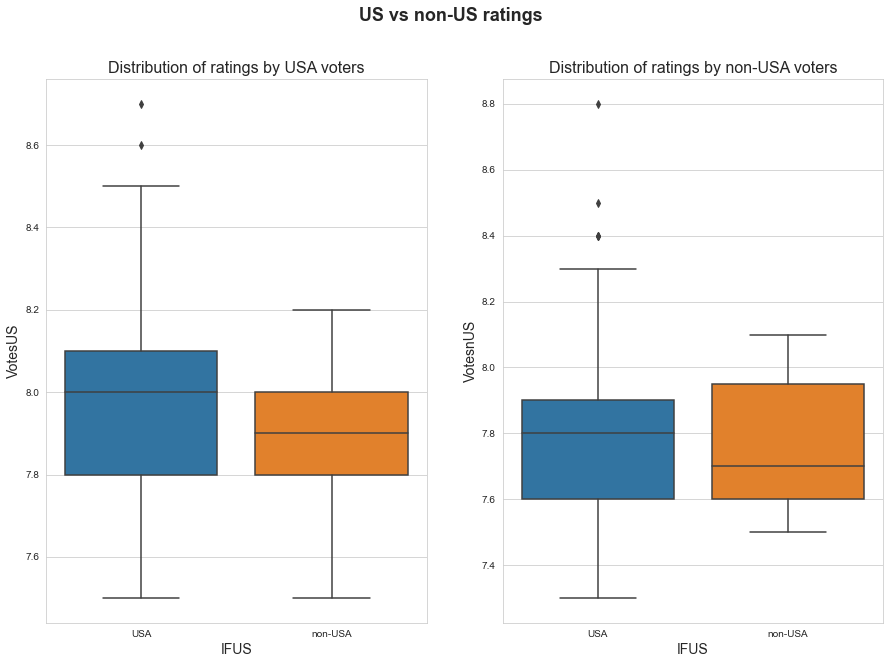

In [51]:
# Box plot - 2: VotesUS(y) vs IFUS(x)

# Defining the subplot. It will have 2 plots in a single row.
f,axes = plt.subplots(1,2, figsize= (15,10))

# Boxplot for VotesUS 
g_USA= sns.boxplot(x= 'IFUS', y= 'VotesUS', data=movies, ax=axes[0])

# Boxplot for VotesnUS 
g_nUSA= sns.boxplot(x= 'IFUS', y= 'VotesnUS', data=movies, ax=axes[1])

# Setting the subplot titles, x and y labels and the plot title.
g_USA.axes.set_title('Distribution of ratings by USA voters', fontsize= 16)
g_nUSA.axes.set_title('Distribution of ratings by non-USA voters', fontsize= 16)
g_USA.axes.set_ylabel('VotesUS', fontsize= 14)
g_USA.axes.set_xlabel('IFUS', fontsize= 14)
g_nUSA.axes.set_ylabel('VotesnUS', fontsize= 14)
g_nUSA.axes.set_xlabel('IFUS', fontsize= 14)
f.suptitle('US vs non-US ratings', fontsize=18, fontweight='bold')

plt.show()

**`Inferences:`**
- Inference 1: Seeing the range and outliers in boxplots it is safe to say that USA movies are a bit overrated while non-USA movies tend to be generally underrated. Same can be confirmed by medians.
- Inference 2: Median rating is higher from USA voters as compared to non-USA voters. Non-USA voters seem to critique the movie a bit more harshly when compared to USA voters.

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [52]:
# Sorting by CVotes1000

genre_top10.sort_values(by= 'CVotes1000', ascending= False, inplace= True)

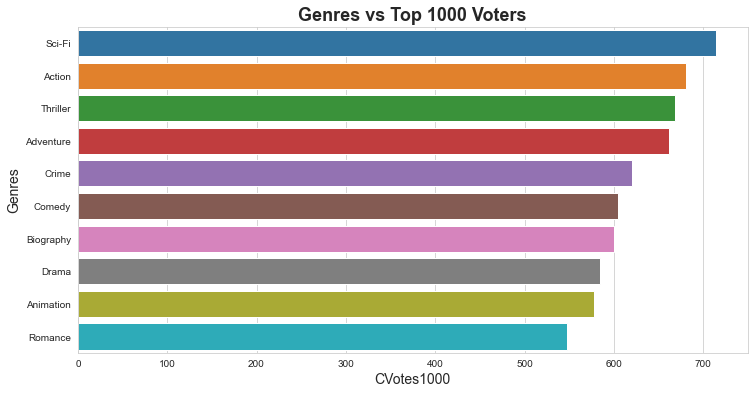

In [53]:
# Bar plot

#Setting figure size
plt.figure(figsize=(12,6))

# plotting the graph
sns.barplot(x= genre_top10.CVotes1000, y= genre_top10.index)

#customizing labels and titles.
plt.title('Genres vs Top 1000 Voters', fontsize=18, fontweight='bold')
plt.xlabel('CVotes1000', fontsize= 14)
plt.ylabel('Genres', fontsize= 14)

plt.show()

**`Inferences:`**

- Sci-Fi seems to be the most popular amongst the top 1000 voters.
- Romance seems to be the least popular amongst the top 1000 voters.
- Vote count for Action, Thriller and Adventure is almost the same. This might be pointing to the fact that these genres generally go together and complement each other.

The genre `Romance` seems to be most unpopular among the top 1000 voters.